## Classification on credit card approval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("credit_card.csv")
labels = pd.read_csv("credit_card_label.csv")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


Label information: 0 is application approved and 1 is application rejected.

In [3]:
labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


Overview of dataframe with labels

In [4]:
# merge label to dataframe
df = pd.merge(df, labels[["Ind_ID", "label"]], on="Ind_ID", how="left")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


Dropping unrelevant variables

In [5]:
df = df.drop(["Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID"], axis=1)
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [6]:
df.shape

(1548, 15)

Convert Birthday count and Employed days to forward count

In [7]:
df["Birthday_count"] = (df["Birthday_count"] * -1) / 365
df["Employed_days"] = (df["Employed_days"] * -1)
df = df.rename(columns={"Birthday_count": "Age"})
df.head()

# negative employed_days means unemployed for current number of days

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.430137,-365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.142466,586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,586,NaN,2,1


Checking for missing values

In [8]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Filling in missing values

In [9]:
# filling in "GENDER" and "Type_Occupation" with mode
df['GENDER'].fillna(df['GENDER'].mode()[0])
df['Type_Occupation'].fillna(df['Type_Occupation'].mode()[0], inplace=True)

# filling in "Annual_income" and "Age" with mean
df['Annual_income'].fillna(df['Annual_income'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.430137,-365243,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.142466,586,Laborers,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,43.946143,586,Laborers,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.142466,586,Laborers,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.142466,586,Laborers,2,1


Checking label if balanced / unbalanced 

In [10]:
df["label"].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

Label is highly unbalanced. Balancing label by oversampling label 1. 

In [11]:
label_0, label_1 = df.label.value_counts()
l0 = df[df['label'] == 0]
l1 = df[df['label'] == 1]

oversample_1 = l1.sample(label_0, replace=True)

balanced_df = pd.concat([oversample_1, l0], axis=0, ignore_index=True)
balanced_df = shuffle(balanced_df)
balanced_df["label"].value_counts()

label
0    1373
1    1373
Name: count, dtype: int64

In [12]:
balanced_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Type_Occupation,Family_Members,label
2450,5035546,F,N,Y,0,126000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,66.813699,-365243,Laborers,1,0
2160,5090186,M,Y,Y,0,450000.0,Pensioner,Higher education,Married,House / apartment,64.249315,-365243,Laborers,2,0
345,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,586,Laborers,2,1
1796,5033439,M,Y,N,2,270000.0,Working,Higher education,Married,House / apartment,32.117808,3002,Laborers,4,0
1310,5029028,F,N,Y,0,90000.0,Working,Lower secondary,Single / not married,Rented apartment,32.947945,4770,Cleaning staff,2,1


One hot enconding and Normalizing features

In [13]:
categorical_var = ["GENDER", "Car_Owner", "Propert_Owner", "Type_Income", "EDUCATION", "Marital_status", "Housing_type", "Type_Occupation"]
continuous_var = ["CHILDREN", "Annual_income", "Age", "Employed_days", "Family_Members"]

# One-hot encode categorical features
for col in categorical_var:
    balanced_df[col] = balanced_df[col].astype('category') 
    balanced_df[col] = balanced_df[col].cat.codes 
    enc = OneHotEncoder() 
    enc_data = pd.DataFrame(enc.fit_transform(balanced_df[[col]]).toarray()) 
    one_hot_df = balanced_df.join(enc_data) 
  
balanced_df = one_hot_df.iloc[:, :-18]

X = balanced_df
y = balanced_df[["label"]]

# Normalize the features in X
cols_to_normalize = ["Annual_income", "Age", "Employed_days", "Type_Occupation"]
scaler = preprocessing.StandardScaler()
X_normalized = scaler.fit_transform(balanced_df[cols_to_normalize])
balanced_df[cols_to_normalize] = X_normalized
balanced_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Type_Occupation,Family_Members,label
2450,5035546,0,0,1,0,-0.597308,1,4,4,1,1.926871,-2.127022,0.090734,1,0
2160,5090186,1,1,1,0,2.218526,1,1,1,1,1.703984,-2.127022,0.090734,2,0
345,5009752,0,1,0,0,1.045262,0,1,1,1,-0.652046,0.457520,0.090734,2,1
1796,5033439,1,1,0,2,0.654174,3,1,1,1,-1.088771,0.474588,0.090734,4,0
1310,5029028,0,0,1,0,-0.910179,3,3,3,4,-1.016618,0.487079,-1.886697,2,1


Split train and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size = 0.8,
                                                    test_size = 0.2, random_state = 100)


y_train = np.array(y_train)
y_train = y_train.ravel()

Train different models

In [15]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)

# Support Vector
sv = svm.SVC()

# Logistic Regression
lr = LogisticRegression(random_state=0)

# Kfold
kf = KFold(n_splits=5)

Average accuracy scores from Kfold cross validation of the models

In [16]:
result_rf = cross_val_score(rf, X_train, y_train, cv=kf)
result_sv = cross_val_score(sv, X_train, y_train, cv=kf)
result_lr = cross_val_score(lr, X_train, y_train, cv=kf)
acc_rf = result_rf.mean()
acc_sv = result_sv.mean()
acc_lr = result_lr.mean()

print(f'Average accuracy of Random Forest: {acc_rf}\nAverage accuracy of Support Vector Classifier: {acc_sv}\nAverage accuracy of Logistic Regression: {acc_lr}')

Average accuracy of Random Forest: 0.965391385379996
Average accuracy of Support Vector Classifier: 0.626143093808242
Average accuracy of Logistic Regression: 0.5387285152205425


Plotting result

Text(0, 0.5, 'Accuracy Score')

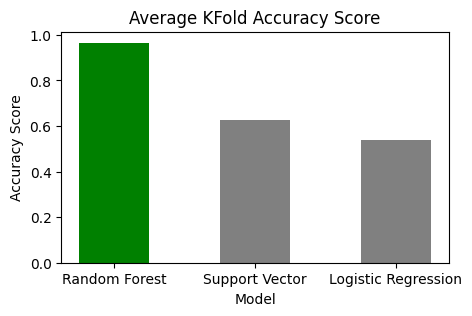

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
res = pd.DataFrame([["Random Forest", acc_rf], ["Support Vector", acc_sv], ["Logistic Regression", acc_lr]], columns = ["Model", "Score"])
ax.bar(res["Model"], res["Score"], color=["green", "gray", "gray"], width=0.5)
ax.set_title("Average KFold Accuracy Score")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy Score")

Random Forest is the better model to use for this classification problem.